In [1]:
import pandas as pd

User = pd.read_csv('EVIO_history_01-06-2022_31-05-2023.csv', sep=";" )
User = User[['Start date','Stop date','Duration (min)', 'Total Energy (kWh)']]

print(User)

             Start date           Stop date Duration (min) Total Energy (kWh)
0    05/31/2023 | 13:46  05/31/2023 | 19:08        321,983               19,2
1    05/31/2023 | 13:46  05/31/2023 | 13:46            0,1                  0
2    05/30/2023 | 09:32  05/30/2023 | 13:29          237,1              45,13
3    05/26/2023 | 18:51  05/26/2023 | 19:13          22,55              28,57
4    05/24/2023 | 18:42  05/24/2023 | 19:17           35,3              25,98
..                  ...                 ...            ...                ...
112  07/01/2022 | 09:33  07/01/2022 | 09:33          0,183                  0
113  06/15/2022 | 18:51  06/15/2022 | 18:57          6,167               3,48
114  06/15/2022 | 18:37  06/15/2022 | 18:49           12,1              14,34
115  06/15/2022 | 15:08  06/15/2022 | 15:51         43,467              41,18
116  06/07/2022 | 13:52  06/07/2022 | 17:36        224,517              40,19

[117 rows x 4 columns]


In [2]:
# Convertendo as colunas de data para o formato de data especificado
User['Start date'] = pd.to_datetime(User['Start date'], format='%m/%d/%Y | %H:%M')
User['Stop date'] = pd.to_datetime(User['Stop date'], format='%m/%d/%Y | %H:%M')


# Criando uma nova coluna 'Date' que contém apenas a data (sem a hora)
User['Date'] = User['Start date'].dt.date

# Convertendo os valores de energia para o formato numérico adequado
User['Total Energy (kWh)'] = User['Total Energy (kWh)'].str.replace(',', '.').astype(float)

# Agrupando os dados pela coluna 'Date' e somando os valores de 'Total Energy (kWh)'
daily_energy_sum = User.groupby('Date')['Total Energy (kWh)'].sum().reset_index()

print(daily_energy_sum)

          Date  Total Energy (kWh)
0   2022-06-07              40.190
1   2022-06-15              59.000
2   2022-07-01               0.000
3   2022-07-14               0.000
4   2022-07-19              30.419
..         ...                 ...
78  2023-05-08              47.330
79  2023-05-24              25.980
80  2023-05-26              28.570
81  2023-05-30              45.130
82  2023-05-31              19.200

[83 rows x 2 columns]


In [3]:
# Criando um intervalo de datas que cubra todo o período de interesse
date_range = pd.date_range(start=User['Date'].min(), end=User['Date'].max(), freq='D')

# Criando um DataFrame com o intervalo de datas
date_df = pd.DataFrame({'Date': date_range})

# Renomeando a coluna 'Date' para 'Date_new'
date_df.rename(columns={'Date': 'Date_new'}, inplace=True)

# Convertendo a coluna 'Date' em 'daily_energy_sum' para datetime
daily_energy_sum['Date'] = pd.to_datetime(daily_energy_sum['Date'])

# Mesclando os DataFrames usando merge
merged_df = pd.merge(date_df, daily_energy_sum, left_on='Date_new', right_on='Date', how='left')

# Preenchendo os valores ausentes na coluna 'Total Energy (kWh)' com zero
merged_df['Total Energy (kWh)'].fillna(0, inplace=True)
merged_df = merged_df.drop(columns=['Date'])
merged_df.rename(columns={'Date_new': 'Date'}, inplace=True)

print(merged_df)

          Date  Total Energy (kWh)
0   2022-06-07               40.19
1   2022-06-08                0.00
2   2022-06-09                0.00
3   2022-06-10                0.00
4   2022-06-11                0.00
..         ...                 ...
354 2023-05-27                0.00
355 2023-05-28                0.00
356 2023-05-29                0.00
357 2023-05-30               45.13
358 2023-05-31               19.20

[359 rows x 2 columns]


In [4]:
# Reiniciando o índice
merged_df.reset_index(drop=True, inplace=True)

# Criando uma nova coluna 'Weekday' que contém o dia da semana
merged_df['Weekday'] = merged_df['Date'].dt.day_name()

print(merged_df)

weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

merged_df['Weekday'] = merged_df['Weekday'].map(weekday_mapping)
print(merged_df)


          Date  Total Energy (kWh)    Weekday
0   2022-06-07               40.19    Tuesday
1   2022-06-08                0.00  Wednesday
2   2022-06-09                0.00   Thursday
3   2022-06-10                0.00     Friday
4   2022-06-11                0.00   Saturday
..         ...                 ...        ...
354 2023-05-27                0.00   Saturday
355 2023-05-28                0.00     Sunday
356 2023-05-29                0.00     Monday
357 2023-05-30               45.13    Tuesday
358 2023-05-31               19.20  Wednesday

[359 rows x 3 columns]
          Date  Total Energy (kWh)  Weekday
0   2022-06-07               40.19        2
1   2022-06-08                0.00        3
2   2022-06-09                0.00        4
3   2022-06-10                0.00        5
4   2022-06-11                0.00        6
..         ...                 ...      ...
354 2023-05-27                0.00        6
355 2023-05-28                0.00        7
356 2023-05-29              

224    False
42      True
285    False
302     True
56     False
       ...  
137    False
155    False
225    False
354    False
254    False
Name: Carregamento, Length: 108, dtype: bool
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


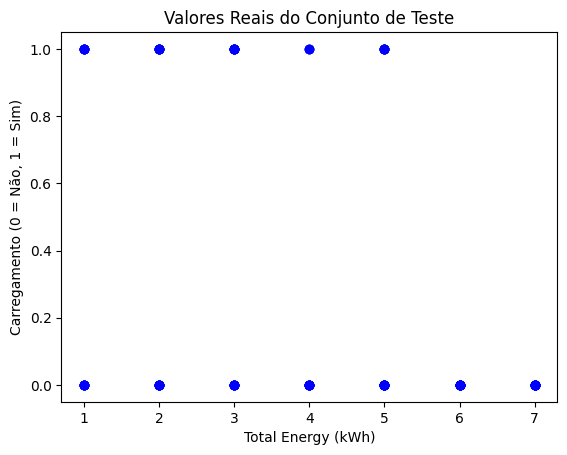

c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


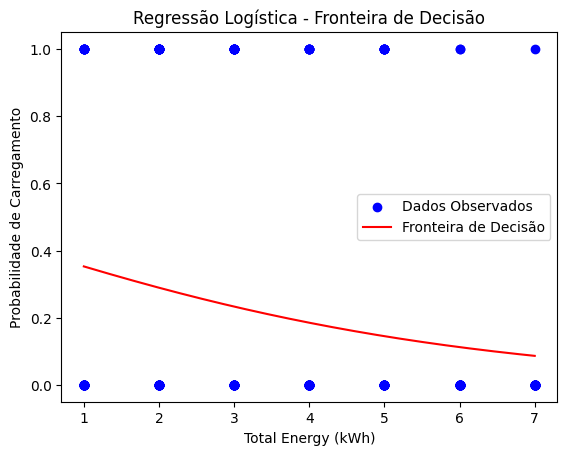

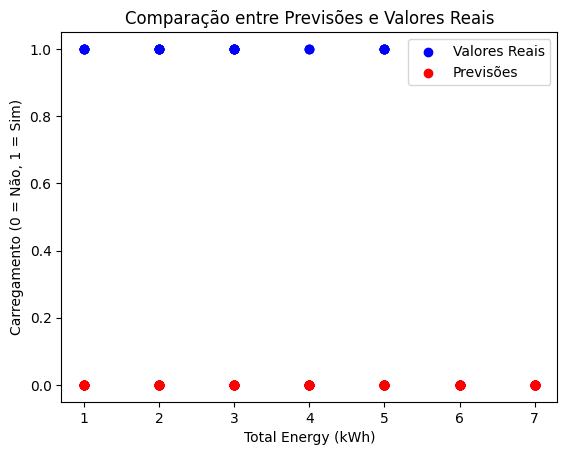

Acurácia do modelo: 0.7222222222222222


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Criar a variável de destino binária
merged_df["Carregamento"] = merged_df["Total Energy (kWh)"] > 0

# Converter a data para o formato datetime
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Separar os dados em conjuntos de treino e teste
X = merged_df[["Weekday"]]
y = merged_df["Carregamento"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

print(y_test)
print(y_pred)


# Plotar apenas os valores reais do conjunto de teste
plt.scatter(X_test, y_test, color='b')
plt.xlabel('Total Energy (kWh)')
plt.ylabel('Carregamento (0 = Não, 1 = Sim)')
plt.title('Valores Reais do Conjunto de Teste')
plt.show()



# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    # Cria uma grade de valores para a variável independente
    X_values = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    # Calcula as probabilidades previstas pelo modelo
    y_proba = model.predict_proba(X_values)[:, 1]
    # Plota os pontos de dados
    plt.scatter(X, y, color='b', label='Dados Observados')
    # Plota a fronteira de decisão
    plt.plot(X_values, y_proba, color='r', label='Fronteira de Decisão')
    plt.xlabel('Total Energy (kWh)')
    plt.ylabel('Probabilidade de Carregamento')
    plt.title('Regressão Logística - Fronteira de Decisão')
    plt.legend()
    plt.show()

# Plotar a fronteira de decisão
plot_decision_boundary(X_train, y_train, model)

# Função para plotar as previsões e os valores reais
def plot_predictions_vs_actual(X_test, y_test, y_pred):
    plt.scatter(X_test, y_test, color='b', label='Valores Reais')
    plt.scatter(X_test, y_pred, color='r', label='Previsões')
    plt.xlabel('Total Energy (kWh)')
    plt.ylabel('Carregamento (0 = Não, 1 = Sim)')
    plt.title('Comparação entre Previsões e Valores Reais')
    plt.legend()
    plt.show()

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Plotar as previsões e os valores reais
plot_predictions_vs_actual(X_test, y_test, y_pred)


# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

